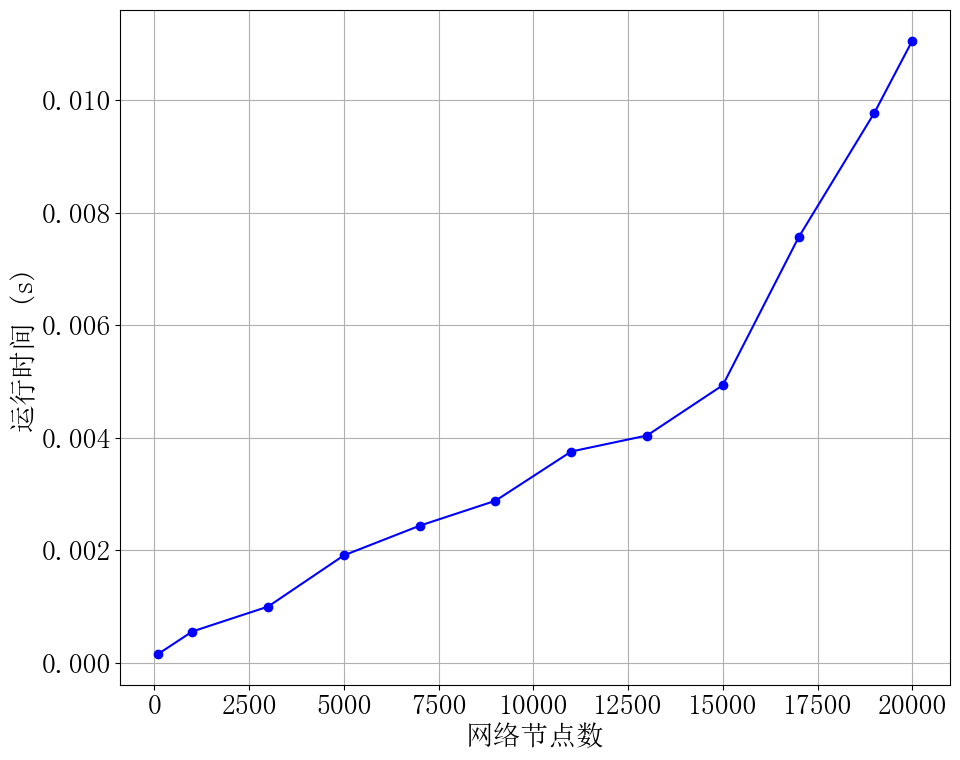

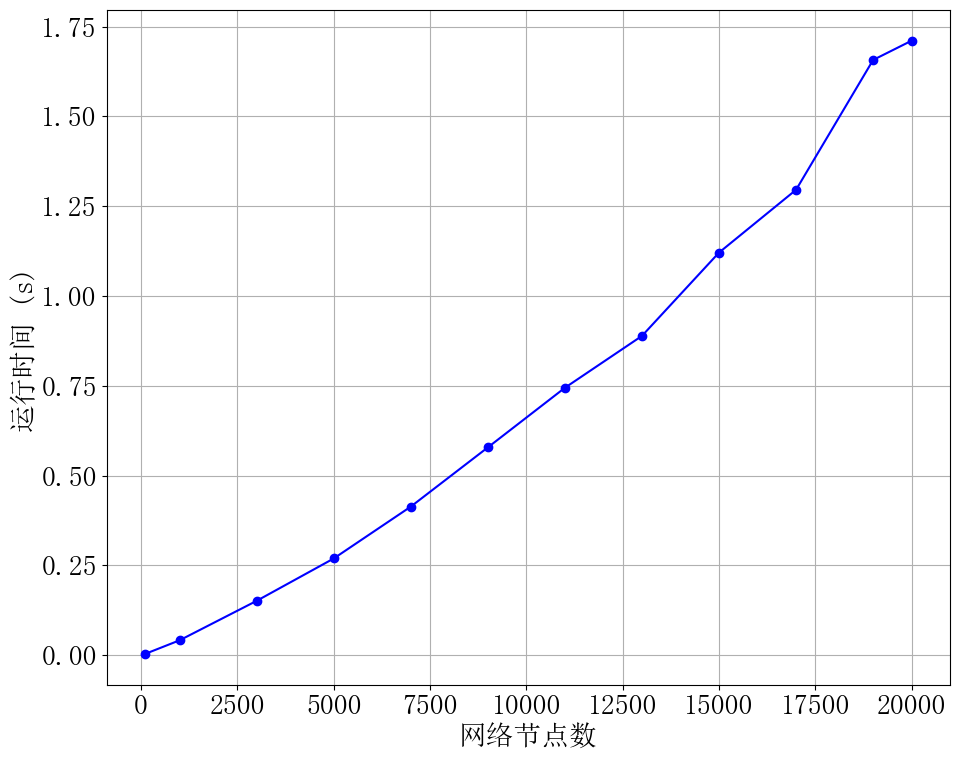

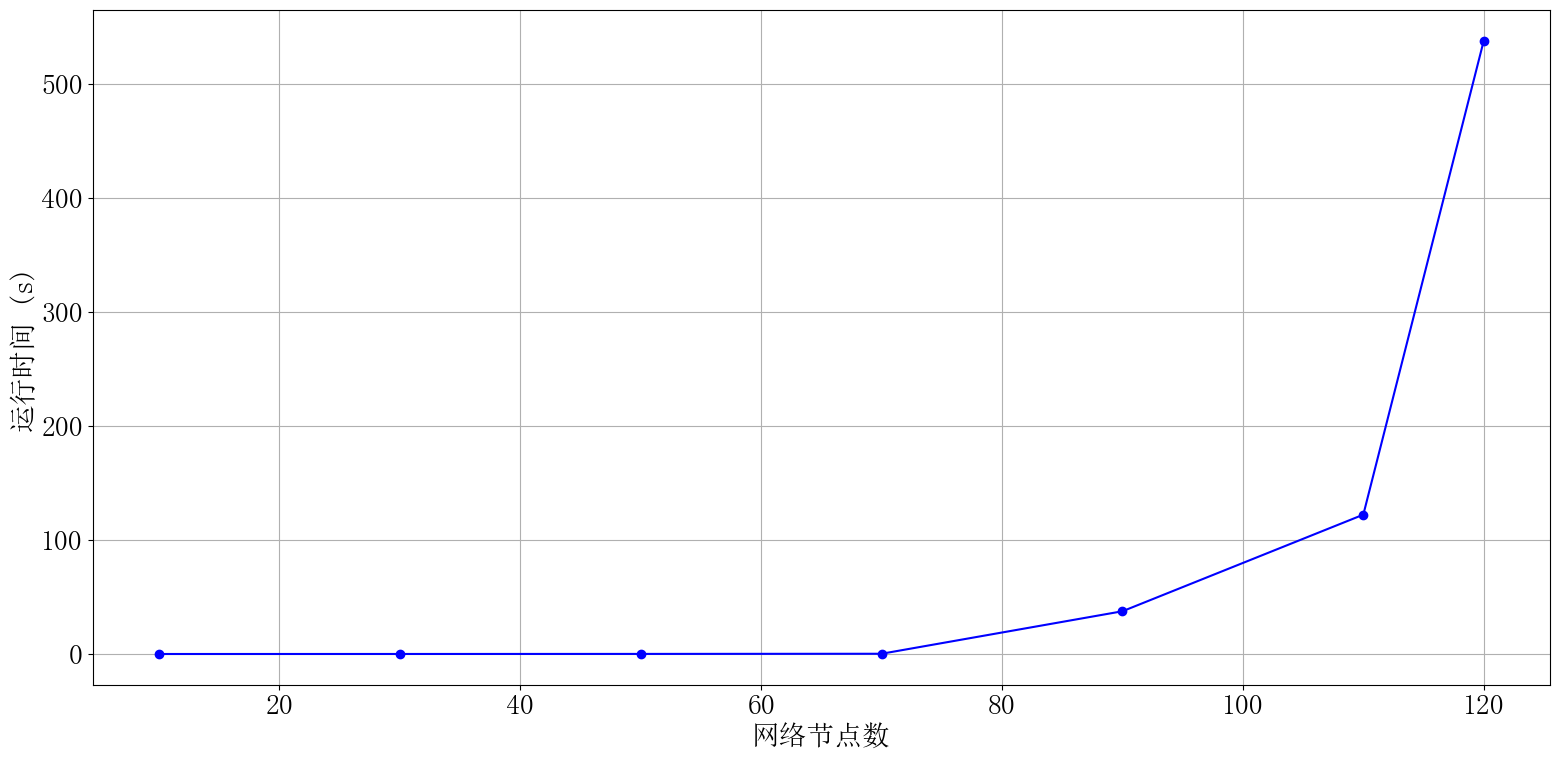

In [1]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['simsun']
plt.rcParams['font.size'] = 20

def plot_time(x: list, y: list, path: str, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.xlabel('网络节点数')
    plt.ylabel('运行时间 (s)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(path)

def plot_attack_graph_time():
    x = [100, 1000, 3000, 5000, 7000, 9000, 11000, 13000, 15000, 17000, 19000, 20000]
    y = [0.003002166748046875, 0.04111981391906738, 0.15100643634796143, 0.26891064643859863, 0.41330931186676023, 0.5782417058944702, 0.7442359924316406, 0.8887013673782349, 1.1206831693649293, 1.295570158958435, 1.6570986747741698, 1.710800290107727]
    plot_time(x, y, "./analyze/attack_graph_time.pdf")

def plot_attack_path_time():
    x = [100, 1000, 3000, 5000, 7000, 9000, 11000, 13000, 15000, 17000, 19000, 20000]
    y = [0.00015374422073364258, 0.0005534052848815918, 0.0009964418411254883, 0.0019069242477416993, 0.002433798313140869, 0.0028776073455810546, 0.003753204345703125, 0.00403771162033081, 0.004932050704956055, 0.007560615539550781, 0.009774432182312012, 0.011056378364562989]
    plot_time(x, y, "./analyze/attack_path_time.pdf")

def plot_mulval_time():
    x = [10, 30, 50, 70, 90, 110, 120]
    y = [0.086, 0.106, 0.152, 0.295, 37.563, 122.268, 537.923]
    plot_time(x, y, "./analyze/mulval_time.pdf", figsize=(16, 8))

plot_attack_path_time()
plot_attack_graph_time()
plot_mulval_time()